<h1 style= "color:#d15a67; text-align: center"> Universidad Castro Carazo  </h1>
<h2 style= "color:#d1284f; text-align: center"> Caso de Estudio Disquera Mundial </h2>
<h3 style = "color:#822d34; text-align: center">  Proyecto Machine Learning </h3>
<h5 style = "color:#d15a67; text-align: center"> Estudiantes: Karina Salazar Gonzalez y Ana Belen Salazar Gonzalez </h5>

<center> <img src= "nota.jpg" style= "width:1100px; height:200px" </center>
<h3 style= "color:#a7c5bd"> Problema de Negocio</h3>
<p style = "text-align: justify; font-family: Tahoma" > Este proyecto pretende ayudar a la empresa Disquera Mundial a esclarecer algunas interrogantes y formar una estrategia de mercadeo. </p>
<p> 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import fitz  


In [2]:
dfMusica = pd.read_csv("song_data.csv")
dfMusica = dfMusica.loc[:, ~dfMusica.columns.str.contains('^Unnamed')]
dfMusica.dropna(inplace=True)
dfMusica.head(5)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
print(dfMusica.shape)
print(dfMusica.info())
print(dfMusica.describe())
print(dfMusica.isnull().sum())

(18835, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB
None
       song_p

In [4]:

# Seleccionar solo columnas numéricas
dfMusica_numeric = dfMusica.select_dtypes(include=[np.number])

# Calcular matriz de correlación
correlation_matrix = dfMusica_numeric.corr()

# Identificar las 5 variables más correlacionadas con la popularidad
target = 'song_popularity'
correlations = correlation_matrix[target].drop(target).abs().sort_values(ascending=False)
top5_features = correlations.head(5).index.tolist()
dfMusica.head(5)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


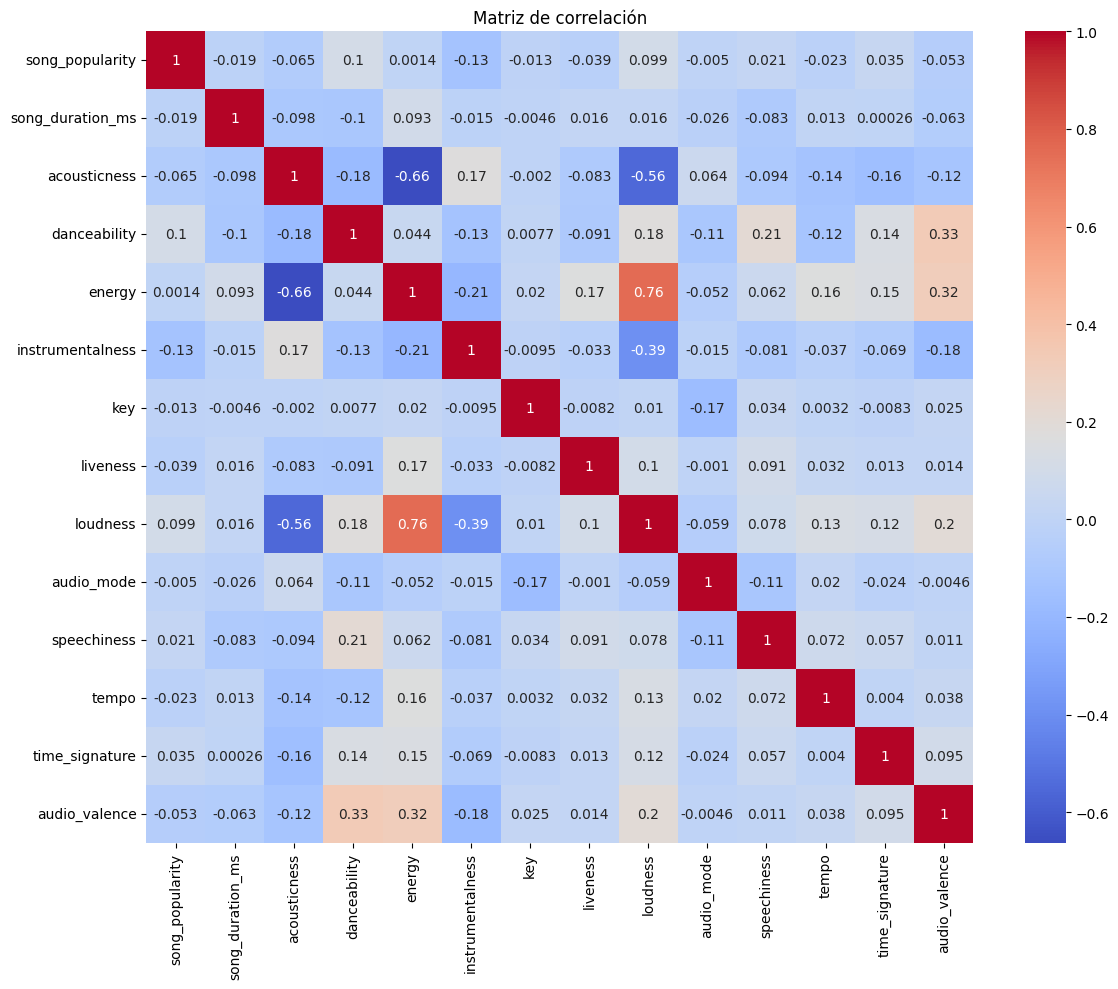

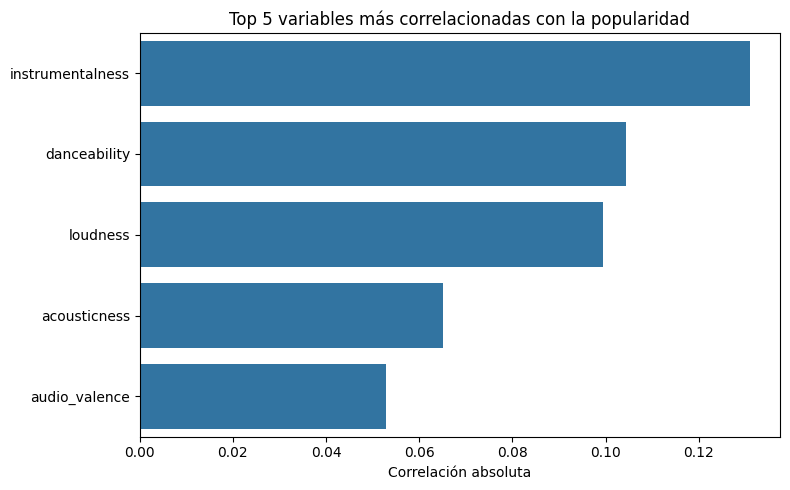

<Figure size 640x480 with 0 Axes>

In [8]:
# Graficar matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.savefig("correlation_matrix.png")
plt.show()  # Mostrar gráfico en pantalla

# Graficar top 5 correlaciones
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations[top5_features].values, y=top5_features)
plt.title("Top 5 variables más correlacionadas con la popularidad")
plt.xlabel("Correlación absoluta")
plt.tight_layout()
plt.savefig("top5_correlations.png")
plt.show()  # Mostrar gráfico en pantalla


#Ajustar el espcaio para mostrar grafico
plt.tight_layout()
plt.show()

In [9]:
X = dfMusica[top5_features]
y = dfMusica[target]

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones y métricas
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


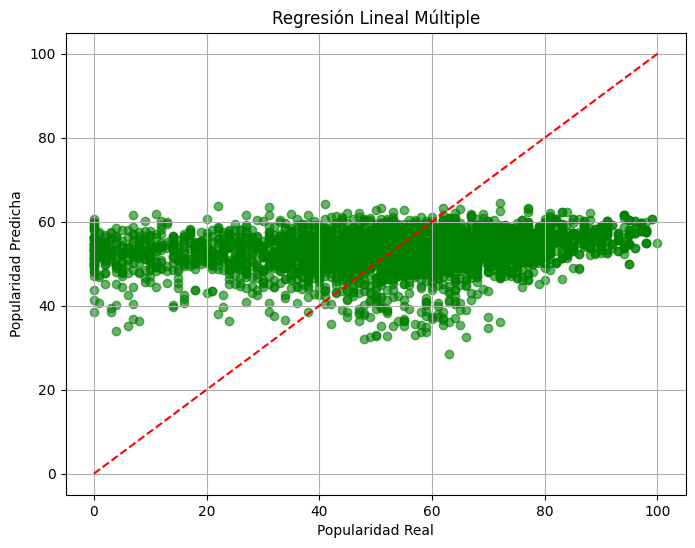

In [10]:
# Gráfico de comparación real vs predicción
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Popularidad Real")
plt.ylabel("Popularidad Predicha")
plt.title("Regresión Lineal Múltiple")
plt.grid(True)
plt.show()


In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo de regresión lineal múltiple:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print("Coeficientes del modelo:")
for feature, coef in zip(top5_features, model.coef_):
    print(f"{feature}: {coef:.2f}")

Evaluación del modelo de regresión lineal múltiple:
Error cuadrático medio (MSE): 464.30
Coeficiente de determinación (R²): 0.04
Coeficientes del modelo:
instrumentalness: -11.37
danceability: 17.25
loudness: 0.34
acousticness: -0.19
audio_valence: -11.22


In [14]:
doc = fitz.open()
page = doc.new_page()

# Título y resumen
page.insert_text((50, 50), "Análisis CRISP-DM - Disquera Mundial", fontsize=16)
summary = f"""
1. Se analizaron {len(dfMusica)} canciones.
2. Top 5 variables más correlacionadas:
   - {top5_features[0]}
   - {top5_features[1]}
   - {top5_features[2]}
   - {top5_features[3]}
   - {top5_features[4]}
3. Modelo de regresión lineal múltiple:
   - MSE: {mse:.2f}
   - R²: {r2:.3f}
"""
page.insert_text((50, 100), summary, fontsize=10)

# Insertar imágenes
for i, image_path in enumerate(["correlation_matrix.png", "top5_correlations.png"]):
    rect = fitz.Rect(50, 250 + i * 300, 500, 500 + i * 300)
    page.insert_image(rect, filename=image_path)

doc.save("informe_disquera_mundial.pdf")
doc.close()
